<a href="https://github.com/victoresende19">![Foo](https://www.jornaldevinhedo.com.br/wp-content/uploads/2022/07/1e45483b-4bba-4b0c-b885-de7715cf8afd.jpeg)</a>

<h2 style="text-align:center">Processamento de Linguagem Natural: Plano de Governo Soraya Thronicke (UNIÃO) <h2\>
<p style="text-align:center;font-size:13px;"></p>
   
<h2 style="text-align:center">Victor Augusto Souza Resende<h2\>
<p style="text-align:center;font-size:13px;">Autor</p>

## Sumário

- [1. Contexto](#1) <br>
    
- [2. Instaçaões e Bibliotecas](#2) <br>
    
- [3. Leitura do arquivo PDF](#3) <br>
    
- [4. Exploração do PDF](#4) <br>
    
- [5. Junção de todo contéudo](#5) <br>
    
- [6. Pipeline](#6) <br>
    * [6.1 - Lower case](#61)<br>
    * [6.2 - Retirar pontuação](#62)<br>
    * [6.3 - Tokenização](#63)<br>
    * [6.4 - Stop words](#64)<br>
        
- [7. Gráficos](#7) <br>
    * [7.1 - Gráfico de frequência dos tokens limpos ](#7)<br>
    * [7.2 - Nuvem de palavras](#7)<br>

## Contexto  <a id="1"></a>

A análise a seguir tem como objetivo aplicar técnicas de Processamento de Linguagem Natural sobre o plano de governo disponibilizado pelos candidatos da eleição presidencial do Brasil em 2022. 

Portanto, o notebook utilizou os dados referentes ao texto disponibilizado pela candidata Soraya Thronicke do partido UNIÃO Brasil, do qual pode ser visualizado clicando <a href="https://drive.google.com/drive/u/1/folders/18cp7TsqWQd01caD3CT8ZkgmeNeRGoI74">aqui</a>.

## Instações e bibliotecas  <a id="2"></a>

In [1]:
!pip install pdfplumber -q
!pip install wordcloud -q
!pip install Pillow -q

In [2]:
import pdfplumber
import re
import nltk
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Leitura do arquivo PDF <a id="3"></a>

In [3]:
mdb = '../PlanosPDF/PLANOUNIAO.pdf'

In [4]:
pdf = pdfplumber.open(mdb)

## Exploração do PDF <a id="4"></a>

In [5]:
# Metadados
pdf.metadata

{'CreationDate': "D:20220811082634-03'00'",
 'Creator': 'Adobe Illustrator 24.2 (Windows)',
 'ModDate': "D:20220811082634-04'00'",
 'Producer': 'Adobe PDF library 15.00',
 'Title': 'Plano de governo'}

In [6]:
# Quantidade de páginas
len(pdf.pages)

73

In [7]:
# Página 1
pdf.pages[0].extract_text()

'PPRROOPPOOSSTTAA  DDEE  \nPPLLAANNOO  DDEE  GGOOVVEERRNNOO\nDDAA  CCAANNDDIIDDAATTAA  ÀÀ  PPRREESSIIDDÊÊNNCCIIAA  DDAA  RREEPPÚÚBBLLIICCAA  \n22002233--22002266'

In [8]:
# Página 3
print(pdf.pages[4].extract_text())

ambiente,  sem  radicalismos,  nem  dogmas,  é  necessário.  É 
preciso privilegiar os interesses nacionais.
Deverá regulamentar o mercado de terras raras e do garimpo, 
além  de  tornar  a  gestão  da  mineração  brasileira  uma 
prioridade de Estado.
A segurança alimentar e toda sua cadeia produtiva, social e 
econômica deverá também ser uma prioridade de Estado. 
Em  nível  internacional,  importantes  órgãos  como  a  ONU  e 
vários governos têm alertado para as nefastas consequências 
da guerra entre Rússia e Ucrânia na oferta de gás, petróleo, 
fertilizantes e alimentos. A crise que essa guerra desencadeou, 
abalou todo o modelo de globalização do sistema produtivo 
internacional, construído desde 1970.
Há,  de  fato,  alertas  importantes  apontando  para  uma  crise 
energética: o aumento exponencial da inflação, da imigração 
forçada da população atingida pela guerra e de dezenas de 


## Junção de todo contéudo <a id="5"></a>
Essa etapa juntará todo o texto extraído em uma única string.



In [9]:
conteudo = ''
for pagina in pdf.pages:
    conteudo = conteudo + pagina.extract_text()

# cinco primeiros
print(conteudo[0:5])

PPRRO


## Pipeline: <a id="6"></a>

1.   Lower case
2.   Retirar pontuação
3.   Tokenização
4.   Stop words


### 1 - Lower case <a id="61"></a>

In [10]:
conteudo = conteudo.lower()
print(conteudo)

pprrooppoossttaa  ddee  
ppllaannoo  ddee  ggoovveerrnnoo
ddaa  ccaannddiiddaattaa  àà  pprreessiiddêênncciiaa  ddaa  rreeppúúbblliiccaa  
22002233--22002266introdução
o  brasil  vive  um  momento  político  e  gerencial  muito  difícil. 
desde a redemocratização, inúmeras foram as tentativas de 
aperfeiçoar a estrutura executiva dos vários governos.
não foi possível implementar um projeto de nação com foco no 
desenvolvimento  nacional,  de  forma  a  corrigir  as  distorções 
geradas  pelas  ações  das  oligarquias  em  todo  o  território 
nacional, sobretudo daquelas que têm maioria no congresso, 
independentemente de suas localizações geográficas.
ou seja, as desigualdades regionais não foram corrigidas, a 
ponto  de  gerar  uma  nação  mais  igualitária  e  capaz  de 
proporcionar  à  sua  gente  –  em  suas  diversas  regiões  – 
qualidade  de  vida  satisfatória,  com  emprego  e  renda 
suficientes para viver bem. tampouco a máquina pública, nos 
seus  três  níveis,  conseguiu

### 2 - Retirar pontuação <a id="62"></a>

In [11]:
# Retirando caracteres especiais
conteudo = re.sub(r'[^\w\s]+', ' ', conteudo)

# Retirando "número_" pois ocorre demasiadamente
conteudo = re.sub(r'\d+_', ' ', conteudo)

print(conteudo)

pprrooppoossttaa  ddee  
ppllaannoo  ddee  ggoovveerrnnoo
ddaa  ccaannddiiddaattaa  àà  pprreessiiddêênncciiaa  ddaa  rreeppúúbblliiccaa  
22002233 22002266introdução
o  brasil  vive  um  momento  político  e  gerencial  muito  difícil  
desde a redemocratização  inúmeras foram as tentativas de 
aperfeiçoar a estrutura executiva dos vários governos 
não foi possível implementar um projeto de nação com foco no 
desenvolvimento  nacional   de  forma  a  corrigir  as  distorções 
geradas  pelas  ações  das  oligarquias  em  todo  o  território 
nacional  sobretudo daquelas que têm maioria no congresso  
independentemente de suas localizações geográficas 
ou seja  as desigualdades regionais não foram corrigidas  a 
ponto  de  gerar  uma  nação  mais  igualitária  e  capaz  de 
proporcionar  à  sua  gente     em  suas  diversas  regiões    
qualidade  de  vida  satisfatória   com  emprego  e  renda 
suficientes para viver bem  tampouco a máquina pública  nos 
seus  três  níveis   conseguiu 

### 3 - Tokenização <a id="63"></a>


In [12]:
conteudo = re.findall(r'\w+', conteudo)

# cinco primeiros
print(conteudo[0:5])

['pprrooppoossttaa', 'ddee', 'ppllaannoo', 'ddee', 'ggoovveerrnnoo']


### 4 - Stop words <a id="64"></a>


In [13]:
stopwords = nltk.corpus.stopwords.words('portuguese')
conteudo_limpo = []

for item in conteudo:
    if (item not in stopwords) and (len(item) > 1):
        conteudo_limpo.append(item)

# cinco primeiros
print(conteudo_limpo[0:5])

['pprrooppoossttaa', 'ddee', 'ppllaannoo', 'ddee', 'ggoovveerrnnoo']


In [14]:
# Após a limpeza, os 30 tokens mais comuns

stats_tokens_limpos = Counter(conteudo_limpo)
conteudo_30 = stats_tokens_limpos.most_common(30)
conteudo_30

[('nacional', 67),
 ('ações', 55),
 ('brasil', 53),
 ('implantar', 41),
 ('segurança', 39),
 ('sistema', 38),
 ('política', 37),
 ('investir', 35),
 ('desenvolvimento', 33),
 ('estado', 33),
 ('produção', 33),
 ('gestão', 32),
 ('programa', 31),
 ('serviços', 29),
 ('social', 29),
 ('saúde', 29),
 ('população', 28),
 ('governo', 27),
 ('economia', 26),
 ('áreas', 26),
 ('acesso', 26),
 ('todo', 25),
 ('internacional', 25),
 ('pública', 24),
 ('milhões', 24),
 ('forma', 23),
 ('mercado', 23),
 ('municípios', 23),
 ('educação', 23),
 ('país', 22)]

## Gráficos <a id="7"></a>

1.   Gráfico de frequência dos tokens limpos
2.   Nuvem de palavras

In [15]:
df = pd.DataFrame(conteudo_30, columns = ['Palavra', 'Frequencia'])
df.head()

,Palavra,Frequencia
0,nacional,67
1,ações,55
2,brasil,53
3,implantar,41
4,segurança,39


### 1 - Gráfico de frequência dos tokens limpos <a id="71"></a>

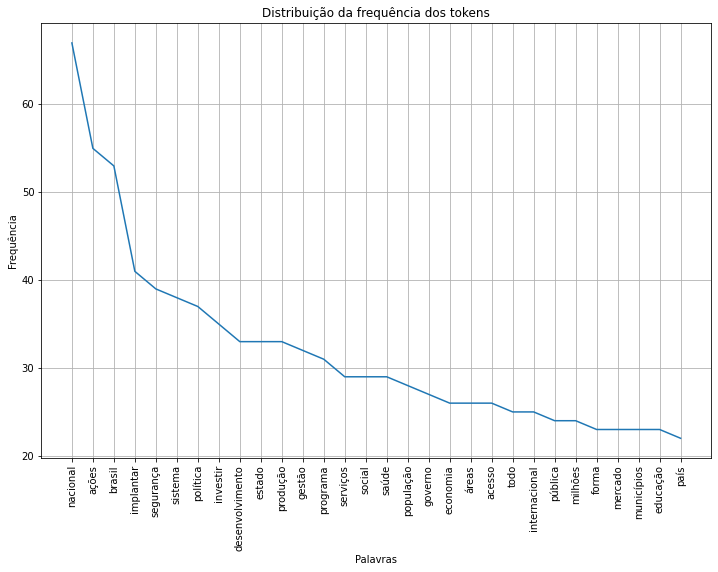

In [16]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(df.Palavra, df.Frequencia)

ax.set(xlabel='Palavras', ylabel='Frequência', title='Distribuição da frequência dos tokens')
plt.xticks(rotation=90)
ax.grid()

plt.show()

### 2 - Nuvem de palavras <a id="72"></a>

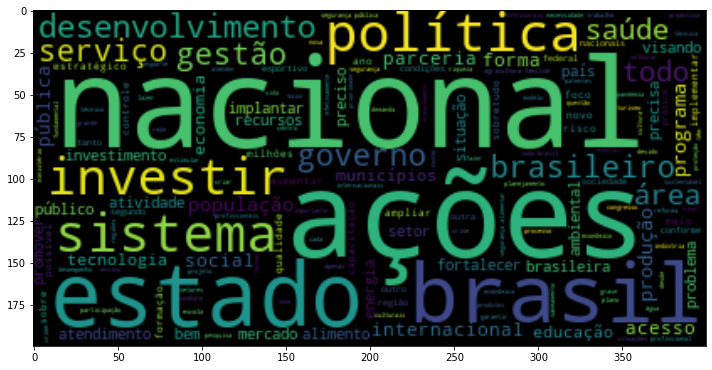

In [17]:
# concatenar os tokens limpos 
tokens_juntos = " ".join(s for s in conteudo_limpo)
wordcloud = WordCloud(background_color="black").generate(tokens_juntos)

# nuvem de palavras
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')

plt.tight_layout()

Victor Resende™ <br>
Outubro, 2022